In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix 

In [ ]:
dados = pd.read_csv('/content/dados.csv')
del dados ['Unnamed: 0']
dados

,Score,País,Gênero,Idade,Fidelidade,Saldo,Produtos,Cartão,Ativo?,Salário,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
lb = LabelEncoder()
dados.iloc[:, 1] = lb.fit_transform(dados.iloc[:, 1])
dados.iloc[:, 2] = lb.fit_transform(dados.iloc[:, 2])

In [ ]:
previsores = dados.iloc[:, 0:10].values
classe = dados.iloc[:, 10].values

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, 
                                                        classe, 
                                                        test_size = 0.3,
                                                        random_state = 0)

In [ ]:
arvore = DecisionTreeClassifier(max_depth = 4, random_state = 0)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
previsoes = arvore.predict(x_teste)
previsoes = pd.DataFrame(previsoes, columns = ['Previsão'])
previsoes

,Previsão
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [ ]:
previsoes_prob = arvore.predict_proba(x_teste)
previsoes_prob = pd.DataFrame(previsoes_prob, columns = ['Ficar', 'Sair'])
previsoes_prob

,Ficar,Sair
0,0.862480,0.137520
1,0.727605,0.272395
2,0.727605,0.272395
3,0.862480,0.137520
4,0.922760,0.077240
...,...,...
2995,0.977602,0.022398
2996,0.878543,0.121457
2997,0.922760,0.077240
2998,0.646552,0.353448


In [ ]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[2283,   96],
       [ 340,  281]])

In [ ]:
taxa_acerto = accuracy_score(y_teste, previsoes)
print('Taxa de acerto no teste: {:.2f}'.format(taxa_acerto))
print('Taxa de acerto no treino: {:.2f}'.format(arvore.score(x_treino, y_treino)))

Taxa de acerto no teste: 0.85
Taxa de acerto no treino: 0.85


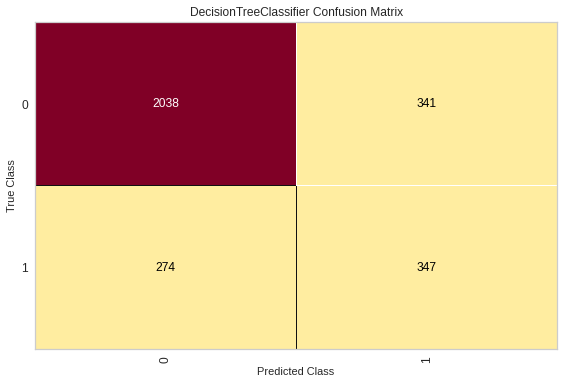

In [ ]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

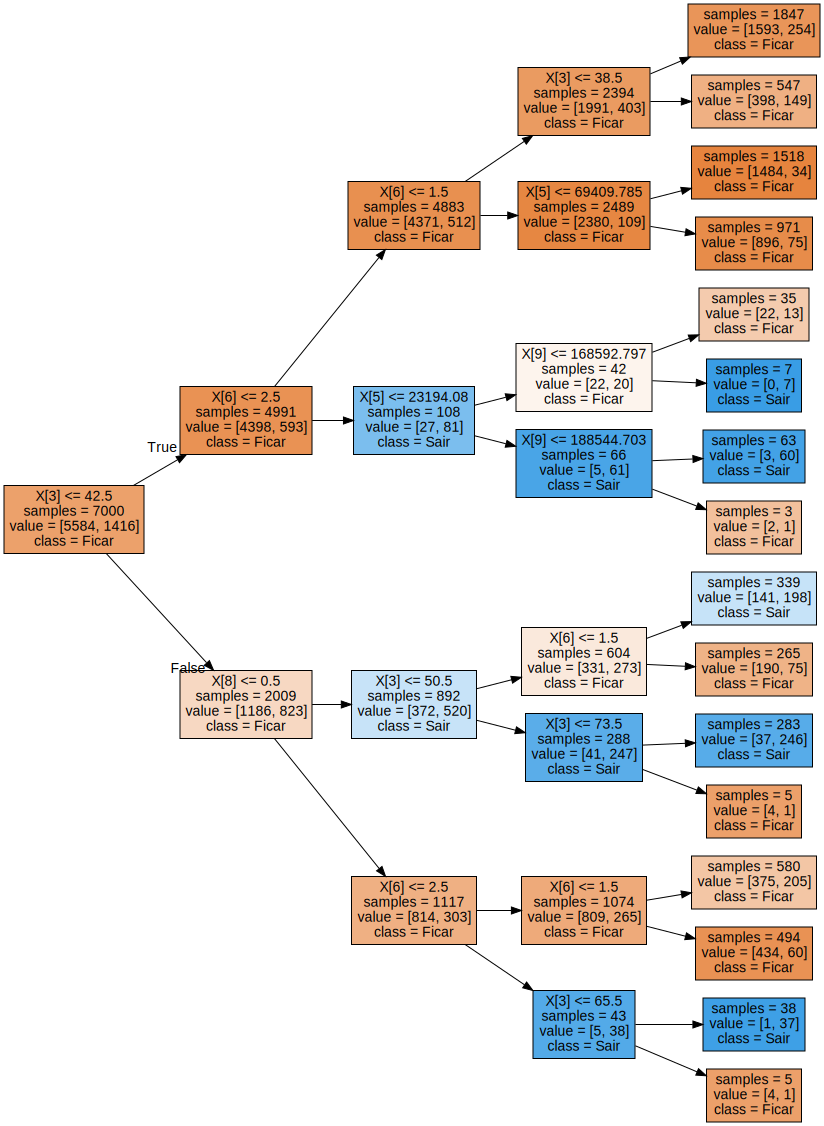

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(arvore, out_file='tree.dot', class_names = ['Ficar', 'Sair'],
                 impurity = False, filled = True, max_depth = 4, rotate = True)

import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)